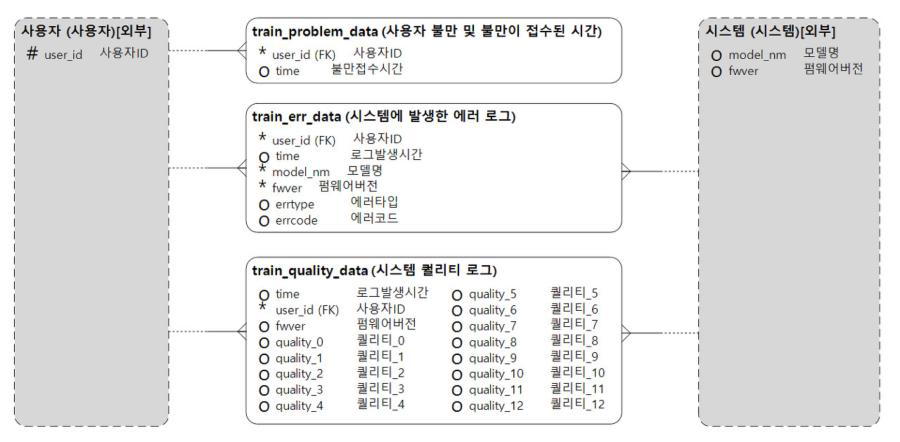

In [1]:
from PIL import Image
image = Image.open("data/ERD.jpeg")
image

### 1. 시스템 퀄리티 로그

In [2]:
problem_data = pd.read_csv('data/train_problem_data.csv')
problem_data

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
...,...,...
5424,20167,20201125120000
5425,16270,20201110120000
5426,19114,20201106230000
5427,21505,20201104110000


In [3]:
# 데이터 타입 확인
problem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  5429 non-null   int64
 1   time     5429 non-null   int64
dtypes: int64(2)
memory usage: 85.0 KB


In [4]:
# 결측치 확인
problem_data.isnull().sum()

user_id    0
time       0
dtype: int64

In [5]:
#time 컬럼 => 날짜형변환
problem_data['time(new)'] = problem_data['time'].astype(np.int64)
problem_data['time(new)'] = pd.to_datetime(problem_data['time(new)'], format='%Y%m%d%H%M%S', errors='coerce')
problem_data['time(new)']

0      2020-11-02 20:00:00
1      2020-11-16 14:00:00
2      2020-11-14 13:00:00
3      2020-11-08 21:00:00
4      2020-11-03 21:00:00
               ...        
5424   2020-11-25 12:00:00
5425   2020-11-10 12:00:00
5426   2020-11-06 23:00:00
5427   2020-11-04 11:00:00
5428   2020-11-02 12:00:00
Name: time(new), Length: 5429, dtype: datetime64[ns]

In [6]:
#시간대 별 빈도 확인
problem_data['time(new)'].value_counts(ascending=False).head(10)

2020-11-30 12:00:00    42
2020-11-30 11:00:00    38
2020-11-03 12:00:00    36
2020-11-02 11:00:00    36
2020-11-30 19:00:00    35
2020-11-20 13:00:00    34
2020-11-23 11:00:00    34
2020-11-02 12:00:00    33
2020-11-11 11:00:00    33
2020-11-16 11:00:00    33
Name: time(new), dtype: int64

### 2. 시스템에 발생한 에러 로그

In [7]:
err_data = pd.read_csv('data/train_err_data.csv')
err_data

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


In [8]:
# 데이터 타입 확인
err_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [9]:
# 결측치 확인
err_data.isnull().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

In [10]:
err_data[err_data['errcode'].isnull() == True]

,user_id,time,model_nm,fwver,errtype,errcode
3825744,13639,20201121191718,model_2,04.33.1261,5,NaN


In [11]:
#time 컬럼 => 날짜형변환
err_data['time(new)'] = err_data['time'].astype(np.int64)
err_data['time(new)'] = pd.to_datetime(err_data['time(new)'], format='%Y%m%d%H%M%S', errors='coerce')
err_data['time(new)']

0          2020-11-01 02:56:16
1          2020-11-01 03:03:09
2          2020-11-01 03:03:09
3          2020-11-01 05:05:14
4          2020-11-01 05:05:15
                   ...        
16554658   2020-11-30 16:30:51
16554659   2020-11-30 17:26:25
16554660   2020-11-30 17:26:25
16554661   2020-11-30 17:26:31
16554662   2020-11-30 21:06:25
Name: time(new), Length: 16554663, dtype: datetime64[ns]

In [12]:
#시간대 별 빈도 확인
err_data['time(new)'].value_counts(ascending=False).head(10)

2020-11-08 02:32:57    631
2020-11-08 02:32:53    585
2020-11-08 02:21:22    526
2020-11-08 02:21:21    521
2020-11-08 02:32:56    490
2020-11-08 02:32:54    420
2020-11-07 23:07:52    418
2020-11-08 02:21:20    417
2020-11-08 02:32:50    395
2020-11-08 02:32:51    387
Name: time(new), dtype: int64

In [13]:
#model 별 빈도
err_data1 = pd.DataFrame(err_data['model_nm'].value_counts(ascending=False))
err_data1.columns = ['count']
err_data1

,count
model_1,5384491
model_0,4176279
model_2,3473254
model_3,1907438
model_4,1507802
model_8,36064
model_7,35356
model_5,32233
model_6,1746


In [14]:
#펌웨어 버전 별 빈도 (top10)
fwver1 = pd.DataFrame(err_data['fwver'].value_counts(ascending=False))
fwver1.columns=['count']
fwver1.head(10)

,count
04.16.3553,5237816
04.22.1750,2874213
04.33.1261,2504871
05.15.2138,1906479
03.11.1167,1505659
04.22.1778,1293946
04.33.1185,963736
04.16.3571,145156
04.73.2237,33537
05.66.3237,31832


In [15]:
#에러 타입 별 빈도(top10)
errtype1 = pd.DataFrame(err_data['errtype'].value_counts(ascending=False))
errtype1.columns=['count']
errtype1.head(10)

,count
23,2276515
31,1985294
22,1865361
15,1604951
4,1296750
16,1249376
32,1130564
5,952920
40,730378
28,544306


In [16]:
# 에러 코드 별 빈도(top10)
errcode1 = pd.DataFrame(err_data['errcode'].value_counts(ascending=False))
errcode1.columns=['count']
errcode1.head(10)

,count
1,8906967
0,2599123
connection timeout,1835600
B-A8002,897863
80,334018
79,332422
14,263577
active,219238
2,166382
84,129876


### 3. 사용자 불만 및 불만이 접수된 시간

In [17]:
quality_data = pd.read_csv('data/train_quality_data.csv')
quality_data

,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0


In [18]:
#time 열: 날짜형변환
quality_data['time(new)'] = quality_data['time'].astype(np.int64)
quality_data['time(new)'] = pd.to_datetime(quality_data['time(new)'], format='%Y%m%d%H%M%S', errors='coerce')
quality_data['time(new)']

0        2020-11-29 09:00:00
1        2020-11-29 09:00:00
2        2020-11-29 09:00:00
3        2020-11-29 09:00:00
4        2020-11-29 09:00:00
                 ...        
828619   2020-11-24 03:30:00
828620   2020-11-24 03:30:00
828621   2020-11-24 03:30:00
828622   2020-11-24 03:30:00
828623   2020-11-24 03:30:00
Name: time(new), Length: 828624, dtype: datetime64[ns]

In [19]:
#데이터 타입 확인 : quality_5, 7, 8, 9, 10 =>  object 타입이라서 변형 필요.(세 자리 마다 , 표시 되어있는 데이터 있음)
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        828624 non-null  int64         
 1   user_id     828624 non-null  int64         
 2   fwver       788544 non-null  object        
 3   quality_0   684192 non-null  float64       
 4   quality_1   828624 non-null  int64         
 5   quality_2   788511 non-null  float64       
 6   quality_3   828624 non-null  int64         
 7   quality_4   828624 non-null  int64         
 8   quality_5   828604 non-null  object        
 9   quality_6   828624 non-null  int64         
 10  quality_7   828624 non-null  object        
 11  quality_8   828624 non-null  object        
 12  quality_9   828624 non-null  object        
 13  quality_10  828624 non-null  object        
 14  quality_11  828624 non-null  int64         
 15  quality_12  828624 non-null  int64         
 16  ti

In [20]:
# quality_5, 7, 8, 9, 10 : str(,제거) -> float 타입으로 형변환
quality_data['quality_5'] = quality_data['quality_5'].str.replace(',', '')
quality_data['quality_7'] = quality_data['quality_7'].str.replace(',', '')
quality_data['quality_8'] = quality_data['quality_8'].str.replace(',', '')
quality_data['quality_9'] = quality_data['quality_9'].str.replace(',', '')
quality_data['quality_10'] = quality_data['quality_10'].str.replace(',', '')

quality_data['quality_5'] = pd.to_numeric(quality_data['quality_5'])
quality_data['quality_7'] = pd.to_numeric(quality_data['quality_7'])
quality_data['quality_8'] = pd.to_numeric(quality_data['quality_8'])
quality_data['quality_9'] = pd.to_numeric(quality_data['quality_9'])
quality_data['quality_10'] = pd.to_numeric(quality_data['quality_10'])

In [21]:
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        828624 non-null  int64         
 1   user_id     828624 non-null  int64         
 2   fwver       788544 non-null  object        
 3   quality_0   684192 non-null  float64       
 4   quality_1   828624 non-null  int64         
 5   quality_2   788511 non-null  float64       
 6   quality_3   828624 non-null  int64         
 7   quality_4   828624 non-null  int64         
 8   quality_5   828604 non-null  float64       
 9   quality_6   828624 non-null  int64         
 10  quality_7   819200 non-null  float64       
 11  quality_8   32768 non-null   float64       
 12  quality_9   688128 non-null  float64       
 13  quality_10  828624 non-null  int64         
 14  quality_11  828624 non-null  int64         
 15  quality_12  828624 non-null  int64         
 16  ti

In [22]:
#결측치 확인
quality_data.isnull().sum()

time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7       9424
quality_8     795856
quality_9     140496
quality_10         0
quality_11         0
quality_12         0
time(new)          0
dtype: int64

In [23]:
#기초통계량 확인 : quality 3, 4는 전부 0
quality_data.describe()

,time,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
count,8.286240e+05,828624.000000,684192.000000,828624.000000,788511.000000,828624.0,828624.0,828604.000000,828624.000000,819200.000000,32768.000000,688128.000000,8.286240e+05,828624.000000,828624.000000
mean,2.020112e+13,17574.678315,4.148701,-0.171782,4.751094,0.0,0.0,74.533171,2.043391,27.011558,0.564697,67.832973,8.965973e+02,-0.181638,0.045878
std,8.863638e+06,4374.113554,479.315029,0.692386,586.252469,0.0,0.0,2278.661590,32.695380,319.663144,25.203441,3599.575570,1.652103e+04,0.397767,0.302452
min,2.020103e+13,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000
25%,2.020111e+13,13685.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
50%,2.020112e+13,17597.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+00,0.000000,0.000000
75%,2.020112e+13,21423.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,0.000000,0.000000
max,2.020113e+13,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,637385.000000,600.000000,7200.000000,1317.000000,397424.000000,1.910175e+06,14.000000,14.000000


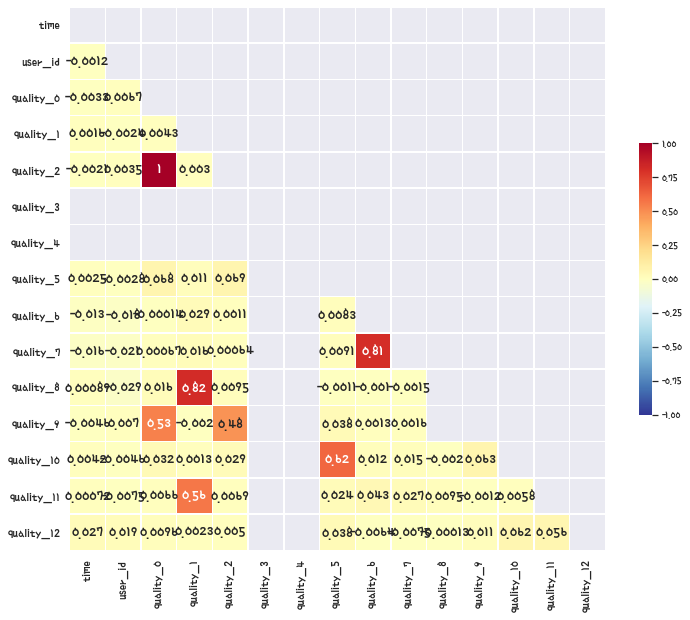

In [24]:
# 변수 간의 상관관계 파악
%matplotlib inline

df = quality_data.corr()
fig, ax = plt.subplots( figsize=(12,10) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1, 
           annot_kws={'size':16}
           )  
plt.show()

In [25]:
#사용자 별 불만 빈도 => 내림차순 정렬
user_count = quality_data['time'].groupby(quality_data['user_id']).count()
user_data = pd.DataFrame(user_count.sort_values(ascending=False))
user_data.head(10)

,time
user_id,
15357,4224
23065,3828
22632,3744
11635,3504
16147,3336
15236,3168
14212,3132
12237,3108
20099,3060


### ➝ 가장 불만 많은 user_id = 15357 => 시스템에 발생한 에러 로그 데이터(err_data)에서 해당 user 살펴보기

In [26]:
user_15357 = err_data[err_data['user_id'] == 15357]
user_15357

,user_id,time,model_nm,fwver,errtype,errcode,time(new)
5715436,15357,20201101023637,model_3,05.15.2138,26,1,2020-11-01 02:36:37
5715437,15357,20201101030234,model_3,05.15.2138,14,1,2020-11-01 03:02:34
5715438,15357,20201101030235,model_3,05.15.2138,10,1,2020-11-01 03:02:35
5715439,15357,20201101030235,model_3,05.15.2138,12,1,2020-11-01 03:02:35
5715440,15357,20201101030235,model_3,05.15.2138,11,1,2020-11-01 03:02:35
...,...,...,...,...,...,...,...
5719607,15357,20201130234051,model_3,05.15.2138,12,1,2020-11-30 23:40:51
5719608,15357,20201130234051,model_3,05.15.2138,10,1,2020-11-30 23:40:51
5719609,15357,20201130234051,model_3,05.15.2138,11,1,2020-11-30 23:40:51
5719610,15357,20201130234051,model_3,05.15.2138,14,1,2020-11-30 23:40:51


In [27]:
user_15357.model_nm.unique()

array(['model_3'], dtype=object)

In [28]:
user_15357.fwver.unique()

array(['05.15.2138'], dtype=object)

In [29]:
user_15357.errtype.unique()

array([26, 14, 10, 12, 11,  3,  4, 13,  7,  6, 15, 16, 27, 28, 17,  5])

In [30]:
user_15357.errcode.unique()

array(['1', '0', '2', 'Q-64002', 'S-65002'], dtype=object)